## FLIGHT PRICE PREDICTION
Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest 
available ticket on a given flight gets more and less expensive over time. This usually happens as 
an attempt to maximize revenue based on -
1. Time of purchase patterns (making sure last-minute purchases are expensive)
2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order 
to reduce sales and hold back inventory for those expensive last-minute expensive 
purchases)
So, you have to work on a project where you collect data of flight fares with other features and 
work to make a model to predict fares of flights.
## STEPS
## 1. Data Collection
You have to scrape at least 1500 rows of data. You can scrape more data as well, it’s up to you, 
More the data better the model
In this section you have to scrape the data of flights from different websites (yatra.com, 
skyscanner.com, official websites of airlines, etc). The number of columns for data doesn’t have 
limit, it’s up to you and your creativity. Generally, these columns areairline name, date of journey, 
source, destination, route, departure time, arrival time, duration, total stops and the target variable 
price. You can make changes to it, you can add or you can remove some columns, it completely
depends on the website from which you are fetching the data.
## 2. Data Analysis
After cleaning the data, you have to do some analysis on the data. 
Do airfares change frequently? Do they move in small increments or in large jumps? Do they tend 
to go up or down over time?
What is the best time to buy so that the consumer can save the most by taking the least risk?
Does price increase as we get near to departure date? Is Indigo cheaper than Jet Airways? Are 
morning flights expensive?
## 3. Model Building
After collecting the data, you need to build a machine learning model. Before model building do 
all data pre-processing steps. Try different models with different hyper parameters and select 
the bestmodel.

### Follow the complete life cycle of data science. Include all the steps like
1. Data Cleaning
2. Exploratory Data Analysis
3. Data Pre-processing
4. Model Building
5. Model Evaluation
6. Selecting the best mode

## Importing all the necessary libraries

In [1]:
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

## The Data

#### Let us import the data which we have scraped and stored in csv file, we will convert into Dataframe format as per convenience.

In [40]:
df = pd.read_csv('Flight_details.csv')
df

,Airline Name,Departure Date,Departure Month,Arrival Time,Departure Time,Source,Destination,Duration,Total Stops,Price
0,IndiGo,24,3,01:10 22 Mar,22:20,Banglore,New Delhi,2h 50m,non-stop,3897
1,Air India,1,5,13:15,05:50,Kolkata,Banglore,7h 25m,2 stops,7662
2,Jet Airways,9,6,04:25 10 Jun,09:25,Delhi,Cochin,19h,2 stops,13882
3,IndiGo,12,5,23:30,18:05,Kolkata,Banglore,5h 25m,1 stop,6218
4,IndiGo,1,3,21:35,16:50,Banglore,New Delhi,4h 45m,1 stop,13302
...,...,...,...,...,...,...,...,...,...,...
5618,Air India,20,4,07:05\n+ 1 day,20:10,Kochi,Pune,10h 55m,1 Stop,"28,564"
5619,Vistara,21,5,19:15,17:30,Mumbai,Bangalore,1h 45m,Non Stop,"6,258"
5620,IndiGo,20,3,20:55,15:55,New Delhi,Kolkata,5h 00m,1 Stop,"7,320"
5621,Vistara,15,5,07:55,05:45,New Delhi,Mumbai,2h 10m,Non Stop,"7,320"


In [4]:
#Let us check the datatypes inwhich all the attributes are available for both test and train sets

df.dtypes

Airline Name       object
Departure Date      int64
Departure Month     int64
Arrival Time       object
Departure Time     object
Source             object
Destination        object
Duration           object
Total Stops        object
Price              object
dtype: object

## Exploratory Data Analysis

#### We can see all the attributes in data set are in categorical format which is not suitable for building our models, hence we need to convert all these into numerical format.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5623 entries, 0 to 5622
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline Name     5623 non-null   object
 1   Departure Date   5623 non-null   int64 
 2   Departure Month  5623 non-null   int64 
 3   Arrival Time     5623 non-null   object
 4   Departure Time   5623 non-null   object
 5   Source           5623 non-null   object
 6   Destination      5623 non-null   object
 7   Duration         5623 non-null   object
 8   Total Stops      5623 non-null   object
 9   Price            5623 non-null   object
dtypes: int64(2), object(8)
memory usage: 439.4+ KB


In [6]:
#checking the names of all the attributes in the data sets

print(' Column names:\n',df.columns)

 Column names:
 Index(['Airline Name', 'Departure Date', 'Departure Month', 'Arrival Time',
       'Departure Time', 'Source', 'Destination', 'Duration', 'Total Stops',
       'Price'],
      dtype='object')


##### Let us check the null values for the datasets, and treat them.

In [7]:
df.isnull().sum()

Airline Name       0
Departure Date     0
Departure Month    0
Arrival Time       0
Departure Time     0
Source             0
Destination        0
Duration           0
Total Stops        0
Price              0
dtype: int64

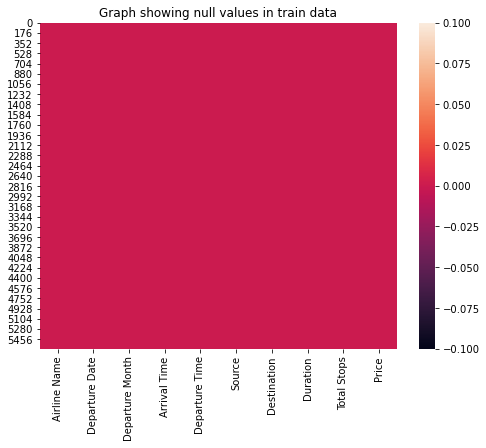

In [8]:
#visualizing the null values after the removal for both train and test data

plt.figure(figsize=(8,6),facecolor='white')
sns.heatmap(df.isnull())
plt.title('Graph showing null values in train data')
plt.show()

In [9]:
#let us check the unique values present in the dataset

for i in df:
    print('Name of the attribute: ',i,'\n',df[i].value_counts())

Name of the attribute:  Airline Name 
 IndiGo                               1710
Jet Airways                          1451
Air India                             734
Multiple carriers                     465
SpiceJet                              411
Vistara                               339
Air Asia                              276
Go First                              156
GoAir                                  75
Jet Airways Business                    2
Multiple carriers Premium economy       2
Vistara Premium economy                 1
Trujet                                  1
Name: Airline Name, dtype: int64
Name of the attribute:  Departure Date 
 9     593
6     556
21    514
27    465
1     457
24    441
15    417
12    395
18    370
3     334
2      77
10     62
20     61
25     60
11     58
4      57
19     56
14     54
23     52
29     51
5      51
28     51
17     50
30     50
8      50
22     50
26     49
13     49
16     47
7      46
Name: Departure Date, dtype: int64
Name o

## Observations
1. There are no null values in the dataset.
2. We need to extract important information from the Arrival time, departure time, so that we can have clear picture of the dataset.
3. There are some values which depicts the same meaning for the records in dataset, we need to treat  those attributes.

    {Like Source has input values 'Bangalore' and 'Banglore' which means the same}

## Univariate Analysis

#### Let us visualize the distribution, relationship and information of all the attributes using various graph methods.

IndiGo                               1710
Jet Airways                          1451
Air India                             734
Multiple carriers                     465
SpiceJet                              411
Vistara                               339
Air Asia                              276
Go First                              156
GoAir                                  75
Jet Airways Business                    2
Multiple carriers Premium economy       2
Vistara Premium economy                 1
Trujet                                  1
Name: Airline Name, dtype: int64


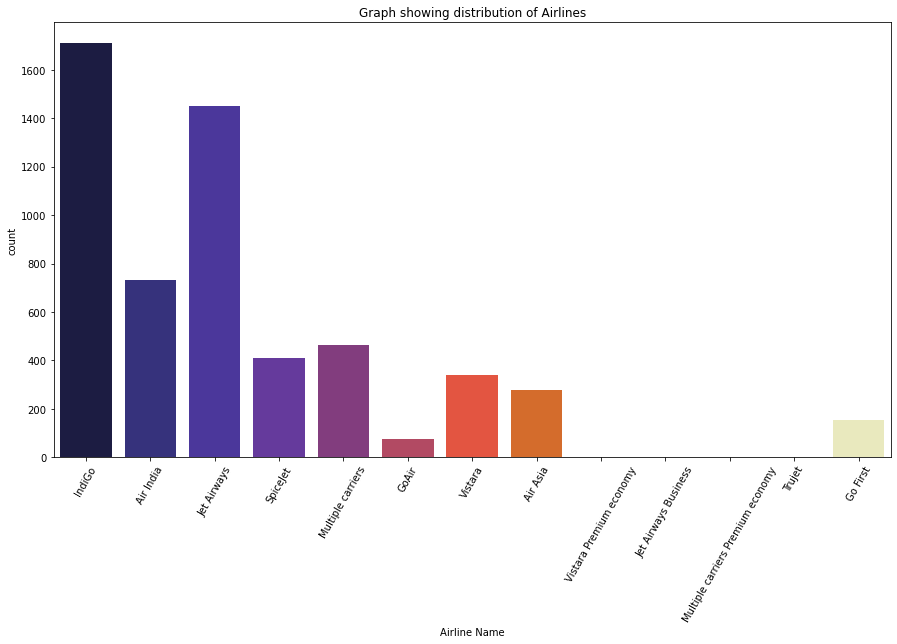

In [10]:
#using bar graph
print(df['Airline Name'].value_counts())

plt.figure(figsize=(15,8),facecolor='white')
sns.countplot(df['Airline Name'],palette='CMRmap')
plt.title('Graph showing distribution of Airlines')
plt.xticks(rotation=60)
plt.show()

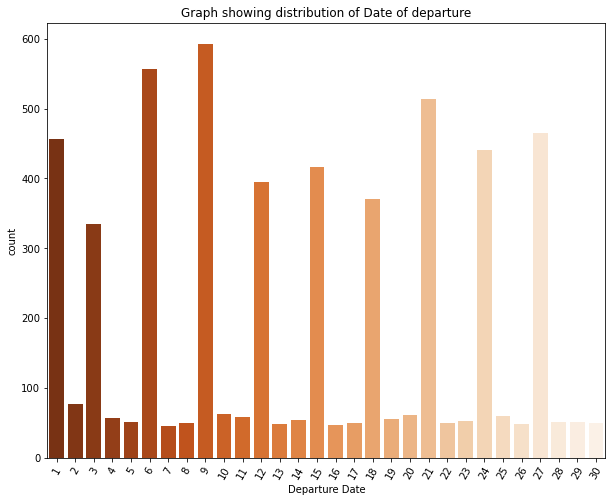

In [11]:
#using bar graph

plt.figure(figsize=(10,8),facecolor='white')
sns.countplot(df['Departure Date'],palette='Oranges_r')
plt.title('Graph showing distribution of Date of departure')
plt.xticks(rotation=60)
plt.show()

5    1865
3    1580
6    1262
4     916
Name: Departure Month, dtype: int64


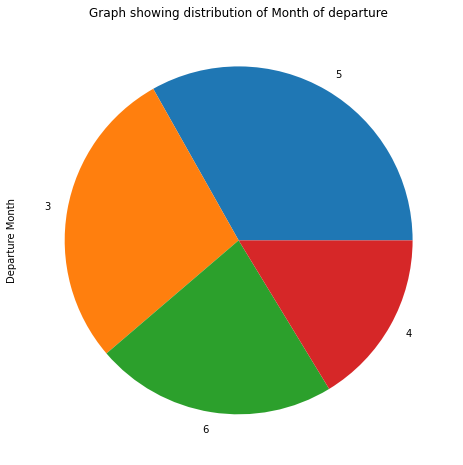

In [12]:
#using pie graph
print(df['Departure Month'].value_counts())

plt.figure(figsize=(10,8),facecolor='white')
df['Departure Month'].value_counts().plot(kind='pie')
plt.title('Graph showing distribution of Month of departure')
plt.xticks(rotation=60)
plt.show()

Delhi        1696
Kolkata      1254
Banglore      839
New Delhi     600
Chennai       464
Mumbai        348
Kochi         122
Hyderabad     100
Ahmedabad     100
Bangalore     100
Name: Source, dtype: int64


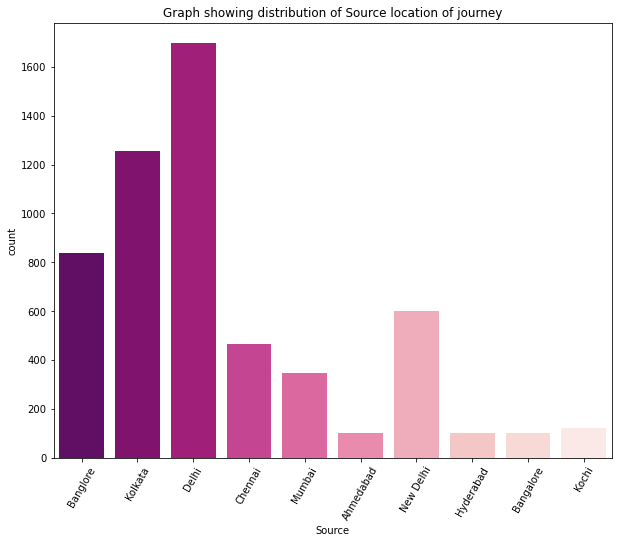

In [13]:
#using bar graph
print(df['Source'].value_counts())
plt.figure(figsize=(10,8),facecolor='white')
sns.countplot(df['Source'],palette='RdPu_r')
plt.title('Graph showing distribution of Source location of journey')
plt.xticks(rotation=60)
plt.show()

Cochin       1696
Banglore     1079
Bangalore     500
Delhi         481
New Delhi     458
Mumbai        400
Kolkata       364
Hyderabad     248
Chennai       175
Pune          122
Ahmedabad     100
Name: Destination, dtype: int64


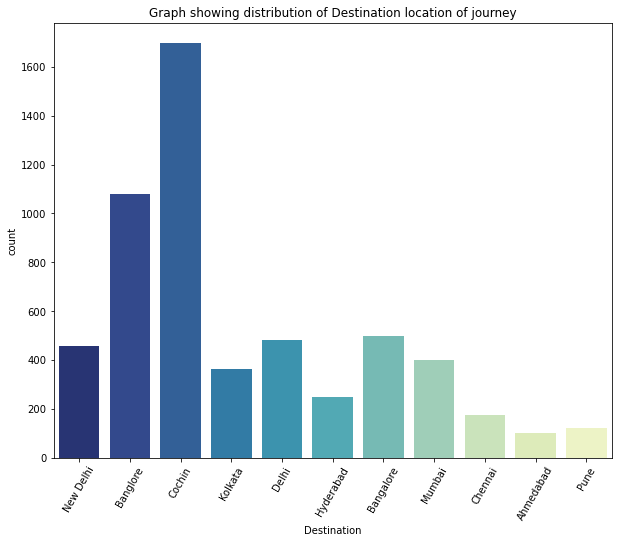

In [14]:
#using bar graph
print(df['Destination'].value_counts())

plt.figure(figsize=(10,8),facecolor='white')
sns.countplot(df['Destination'],palette='YlGnBu_r')
plt.title('Graph showing distribution of Destination location of journey')
plt.xticks(rotation=60)
plt.show()

### Changing the datatype of Price from categorical to Numerical

In [41]:
for i in range(len(df)):
    df['Price'][i]=df['Price'][i].replace(',','')

df['Price'] = df['Price'].astype(int)

In [42]:
#Replacing names of cities mentioned different ways in Source and Destination into same format.
df['Source'].replace({'New Delhi':'Delhi','Banglore':'Bangalore'},inplace=True)

df['Destination'].replace({'New Delhi':'Delhi','Banglore':'Bangalore'},inplace=True)


#converting airlines with less numbers as others 
df['Airline Name'].replace(to_replace=['Go First','GoAir','Multiple carriers Premium economy','Jet Airways Business','Trujet','Vistara Premium economy'],value='Others', inplace=True)


In [43]:
#cleaning the 'Total Stops' attribute
df['Total Stops'].replace(to_replace=['1 stop','1 Stop'],value=1,inplace=True)
df['Total Stops'].replace(to_replace=['non-stop','Non Stop'],value=0,inplace=True)
df['Total Stops'].replace(to_replace=['3 stops','3 Stop(s)'],value=3,inplace=True)
df['Total Stops'].replace(to_replace=['2 stops','2 Stop(s)'],value=2,inplace=True)
    
df['Total Stops'].value_counts()

1    2776
0    2274
2     553
3      20
Name: Total Stops, dtype: int64

1    2776
0    2274
2     553
3      20
Name: Total Stops, dtype: int64


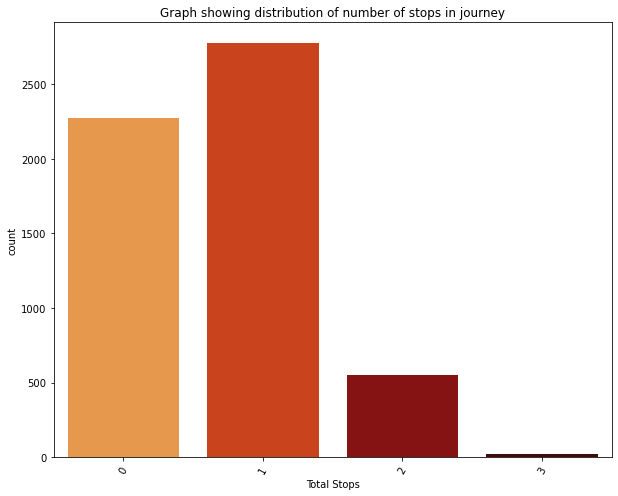

In [18]:
#using bar graph
print(df['Total Stops'].value_counts())

plt.figure(figsize=(10,8),facecolor='white')
sns.countplot(df['Total Stops'],palette='gist_heat_r')
plt.title('Graph showing distribution of number of stops in journey')
plt.xticks(rotation=60)

#labels on bar
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
    
plt.show()

## Observations:
1. Indigo flights and Jet Airways constitutes nearly 50% of total flights compared to other flights used. They hospitality of the flight, pricing ranges may be considered for this high number of usage.
2. The number of flights are distributed normally except Weekends or holidays over the period. 
3. Nearly 50 % of total flight travel is observed from New Delhi and Kolkata.
4. 30% of the flights travelling have Cochin as destination.
5. 75% of the flights travelling are not having any stops or have only 1 stop.

##############################################

1. We have to convert the price into numerical format.
2. As Jet Airways Business, Go Air, Go First, Vistara Premium Economy, Multiple carriers Premium economy, Trujet has very less flights we need to take care of this data
3. Soures have same locations but mentioned in different ways, we can correct the format.
4. Destination have same locations but mentioned in different ways, we can correct the format.
5. Total number of stops have the information but mentioned in different ways we need to change the format.


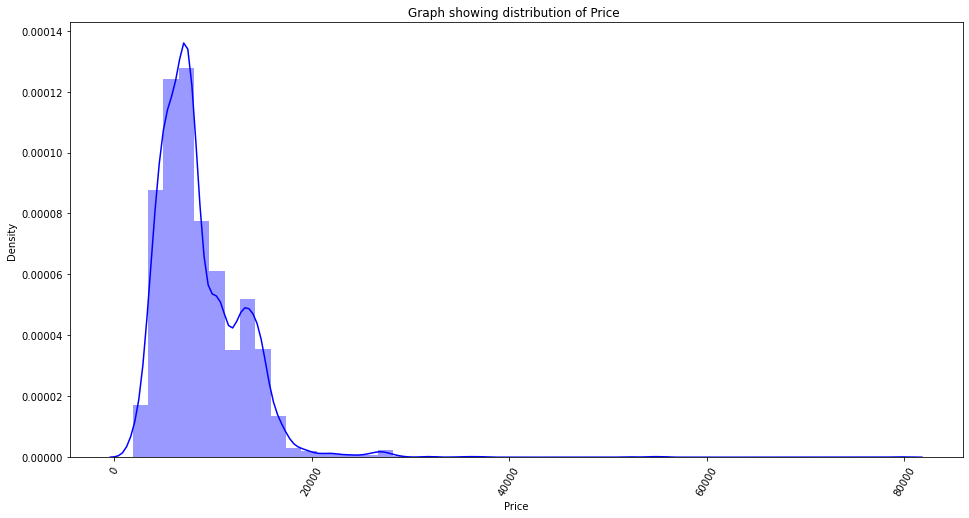

In [19]:
plt.figure(figsize=(16,8), facecolor='white')
sns.distplot(df['Price'], color='blue')
plt.xticks(rotation=60)
plt.title("Graph showing distribution of Price ")
plt.show()

#### The price range was varied in between 1000 to 15000 on average,Some luxury Business class flights are having upto 50000 cost are also seen.

## Bi-variate Analysis

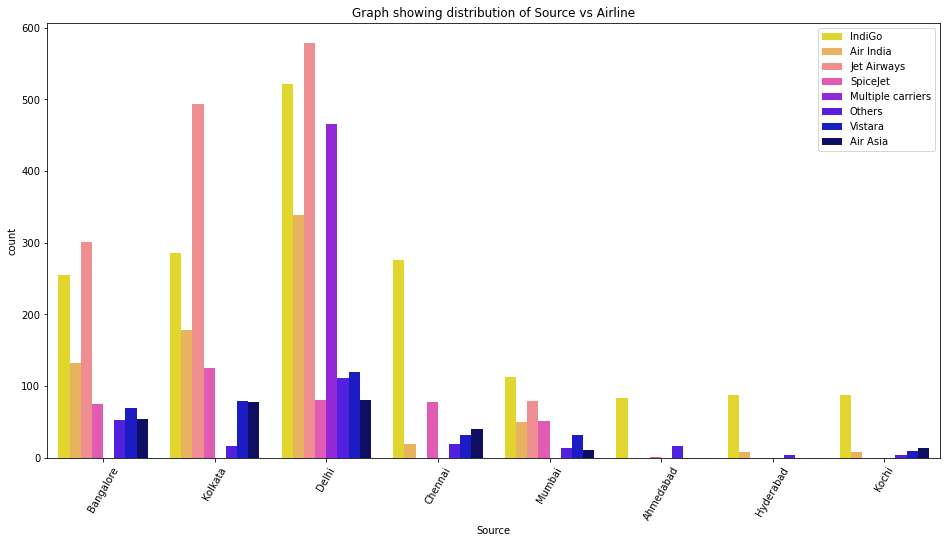

In [20]:
plt.figure(figsize=(16,8), facecolor='white')
sns.countplot(x='Source', hue='Airline Name', data=df,palette='gnuplot2_r')
plt.xticks(rotation=60)
plt.title("Graph showing distribution of Source vs Airline")
plt.legend(loc = 'upper right')
plt.show()

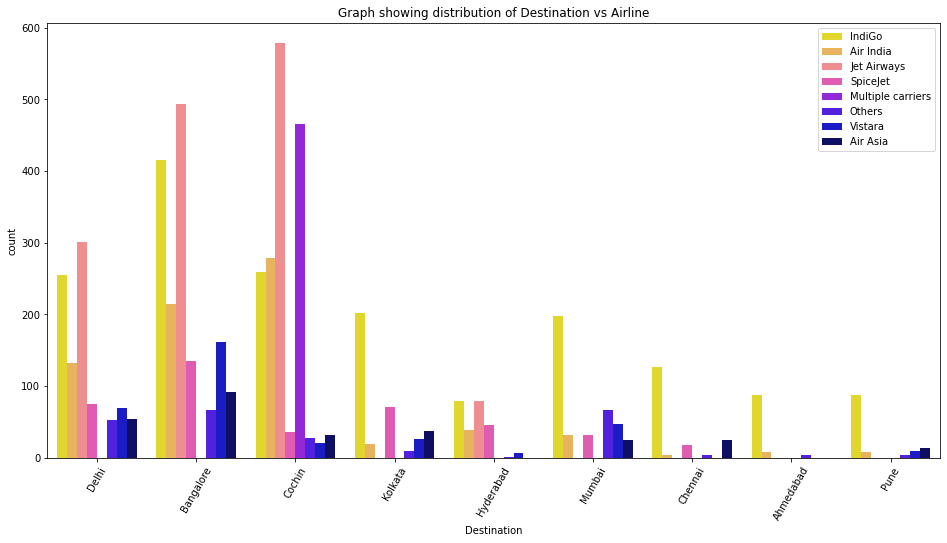

In [21]:
plt.figure(figsize=(16,8), facecolor='white')
sns.countplot(x='Destination', hue='Airline Name', data=df,palette='gnuplot2_r')
plt.xticks(rotation=60)
plt.title("Graph showing distribution of Destination vs Airline")
plt.legend(loc = 'upper right')
plt.show()

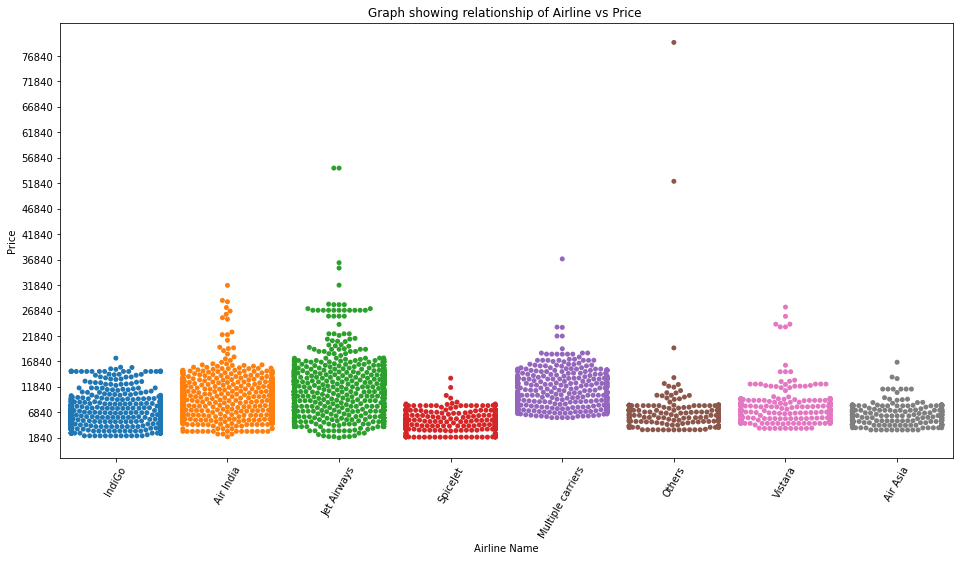

In [22]:
plt.figure(figsize=(16,8), facecolor='white')
sns.swarmplot(y='Price', x='Airline Name', data=df)
plt.title("Graph showing relationship of Airline vs Price ")
plt.xticks(rotation=60)
plt.yticks(np.arange(min(df['Price']), max(df['Price']), 5000))
plt.show()

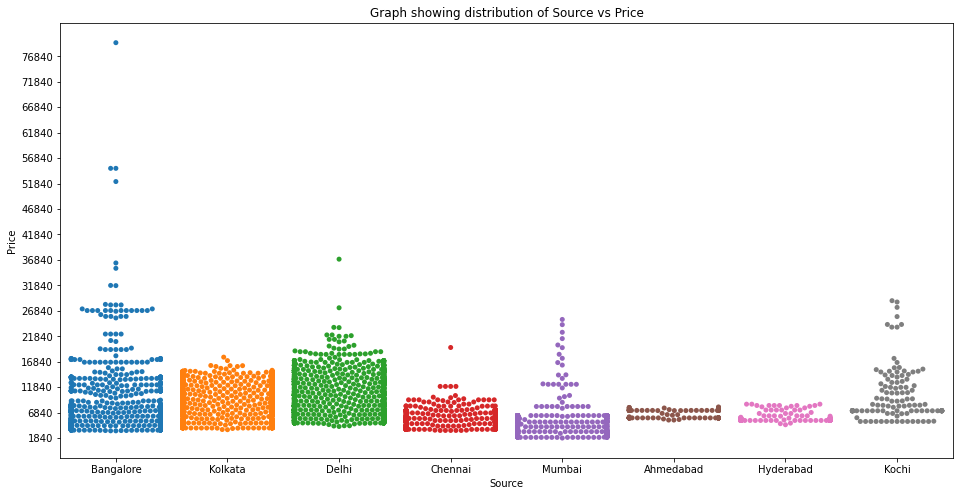

In [24]:
plt.figure(figsize=(16,8), facecolor='white')
sns.swarmplot(x='Source', y='Price',data=df) 
plt.title("Graph showing distribution of Source vs Price")
plt.xticks(rotation=0)
plt.yticks(np.arange(min(df['Price']), max(df['Price']), 5000))
plt.show()

## Observations
1. We see Jet airways and Indigo are the highest used airline
2. There are few flights going from Hyderabad and Kochi.
3. The average price of flights have average price of 7500-10000.
4. Flights moving from Bangalore have the highest price ranges.

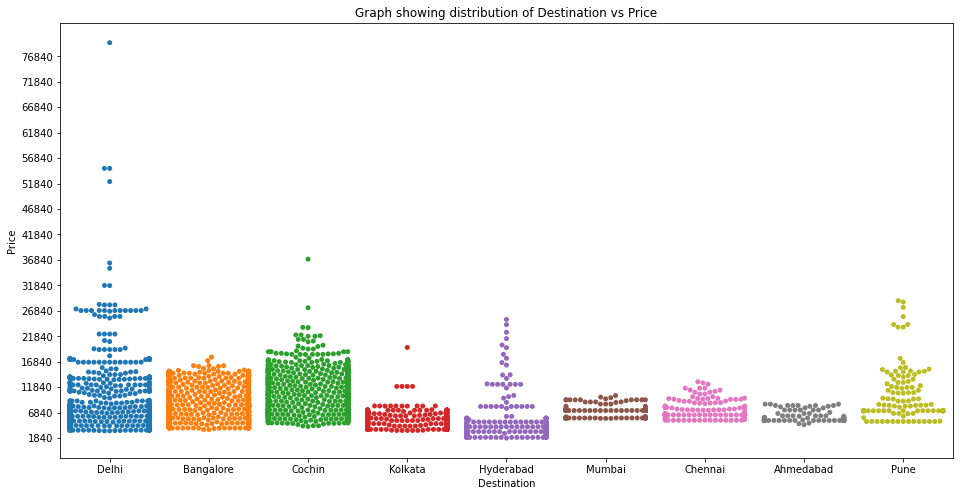

In [25]:
plt.figure(figsize=(16,8), facecolor='white')
sns.swarmplot(x='Destination', y='Price',data=df) 
plt.title("Graph showing distribution of Destination vs Price")
plt.xticks(rotation=0)
plt.yticks(np.arange(min(df['Price']), max(df['Price']), 5000))
plt.show()

1    2776
0    2274
2     553
3      20
Name: Total Stops, dtype: int64


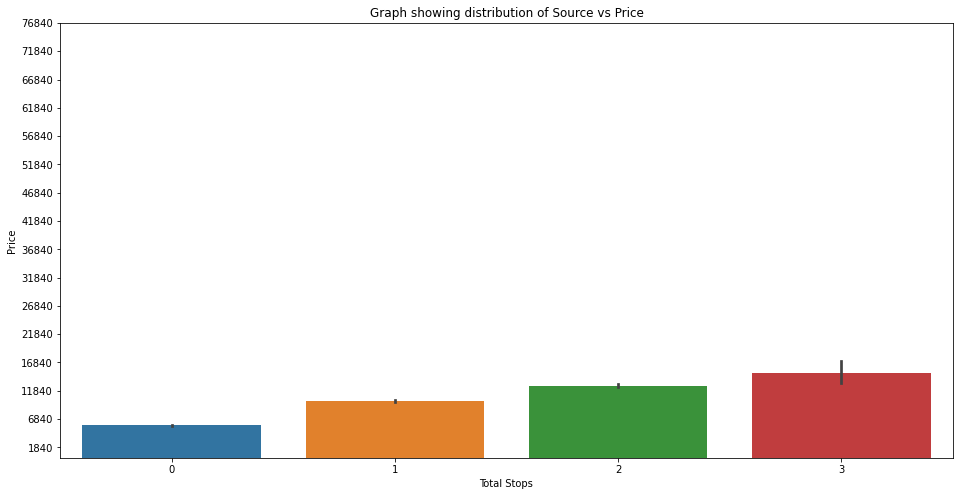

In [26]:
print(df['Total Stops'].value_counts())

plt.figure(figsize=(16,8), facecolor='white')
sns.barplot(y='Price',x='Total Stops',data=df) 
plt.title("Graph showing distribution of Source vs Price")
plt.xticks(rotation=0)
plt.yticks(np.arange(min(df['Price']), max(df['Price']), 5000))
plt.show()

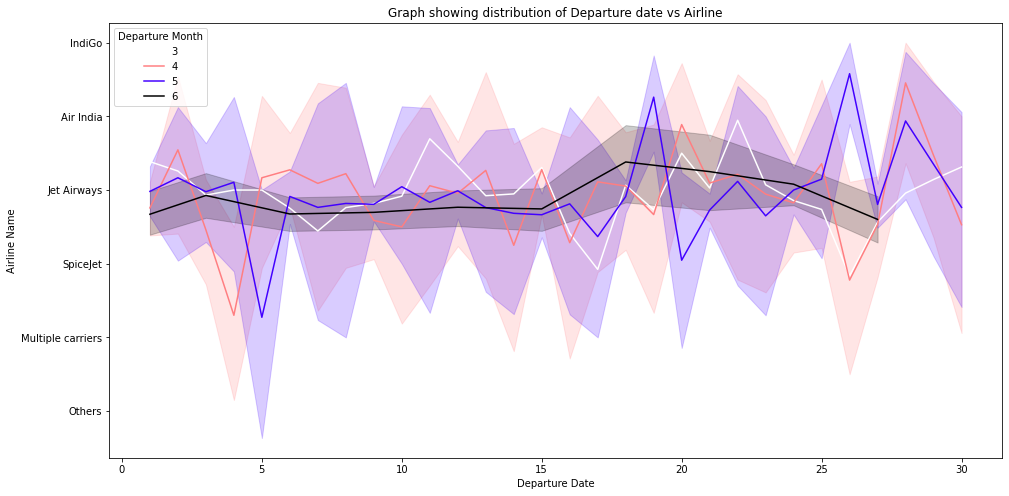

In [27]:
plt.figure(figsize=(16,8), facecolor='white')
sns.lineplot(x='Departure Date', y='Airline Name', hue='Departure Month', data=df,palette='gnuplot2_r')
plt.title("Graph showing distribution of Departure date vs Airline")
plt.xticks()
plt.show()

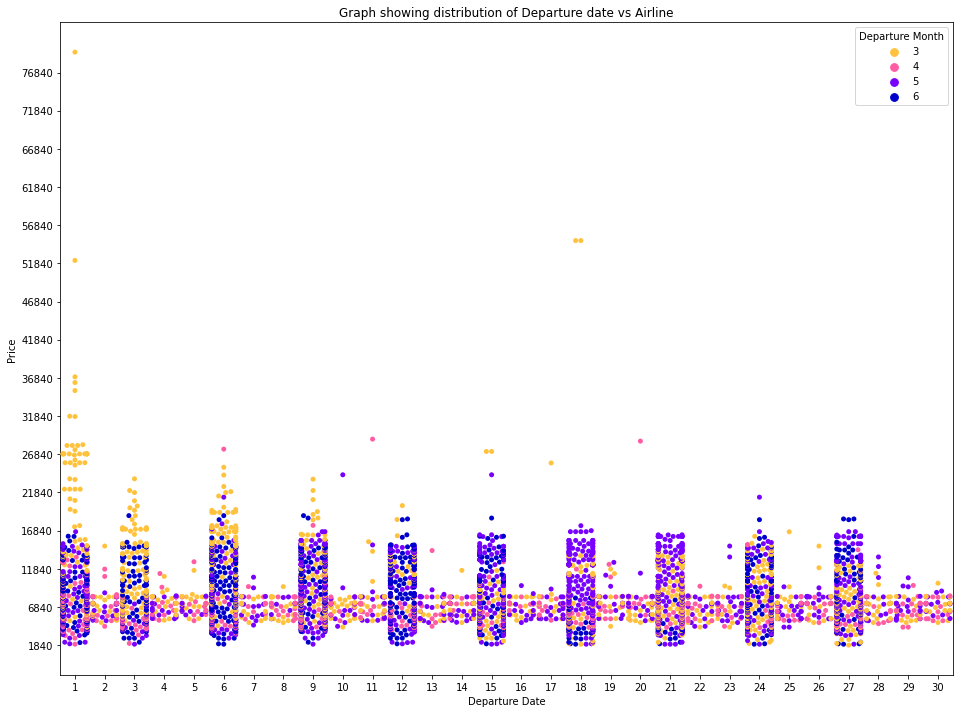

In [29]:
plt.figure(figsize=(16,12), facecolor='white')
sns.swarmplot(x='Departure Date', y='Price', hue='Departure Month', data=df,palette='gnuplot2_r')
plt.title("Graph showing distribution of Departure date vs Airline")
plt.yticks(np.arange(min(df['Price']), max(df['Price']), 5000))
plt.show()

## Observations:

1. Do airfares change frequently? Do they move in small increments or in large jumps? Do they tend to go up or down over time? Does price increase as we get near to departure date?
>   We can see there are peaks formed in all the 4 months of observations marked in different colours, 
    All the spikes seen are due to weekends(saturdays n sundays). 
    The increase in price of tickets is about 10% of the regular price range.
    We can expect the price is gradually higher then regular days.

2. What is the best time to buy so that the consumer can save the most by taking the least risk?
> As per the observations, No matter of date of booking, we can expect pricings are to be higher during the weekends, 
one month prior of the expected date of journey can reduce the price of tickets during weekdays.

4. Is Indigo cheaper than Jet Airways?
> The price ranging of Indigo is in around the mean of 8500- 10000, Jetairways is having  price range which is higher than indigo which is around 10000-15000 range, Where as we can see the highest price range in Business class flights.  

## Data Preprocessing

1. We can extract hours and minutes from the arrival time and departure time.
2. Based on the hours we can split the data into early morning flights, morning flights or evening/Night flights.
3. Total Stops can be replaced with non-stop = 0, 1-stop=1, 2-stop=2, 3-stop=3, 4-stop=4 etc
4. Source and Destinations are to be encoded.

In [44]:
for i in range(len(df['Arrival Time'])):
    df['Arrival Time'][i]=df['Arrival Time'][i].replace('+ 1 day','').split('\n')[0]
    df['Arrival Time'][i]=df['Arrival Time'][i].split(' ')[0]

In [45]:
#extracting Hour of Arrival and minute of departure from departure attribute 
df['Hour_Arr']  = pd.to_datetime(df['Arrival Time']).dt.hour
df['Minute_Arr']  = pd.to_datetime(df['Arrival Time']).dt.minute

#dropping the arrival_time from the dataset permanently
df.drop(columns='Arrival Time', inplace=True)


In [49]:
for i in range(0,24):
    if i<=6:
        df['Hour_Arr'].replace(i,'Early Morning',inplace=True)
        
    elif i>6 and i <=12:
        df['Hour_Arr'].replace(i,'Morning',inplace=True)
        
    elif i>12 and i<=18:
        df['Hour_Arr'].replace(i,'Afternoon',inplace=True)
        
    elif i>18 and i<=23:
        df['Hour_Arr'].replace(i,'Night',inplace=True)
    else:
        pass
        
df['Hour_Arr'].value_counts()

Night            1865
Morning          1684
Early Morning    1082
Afternoon         992
Name: Hour_Arr, dtype: int64

In [48]:
#extracting Hour of departure and minute of departure from departure attribute 
df['Hour_Dep']  = pd.to_datetime(df['Departure Time']).dt.hour
df['Minute_Dep']  = pd.to_datetime(df['Departure Time']).dt.minute

#dropping the dep_time from the dataset permanently
df.drop(columns='Departure Time', inplace=True)

In [50]:
for i in range(0,24):
    if i<=6:
        df['Hour_Dep'].replace(i,'Early Morning',inplace=True)
    elif i>6 and i <=12:
        df['Hour_Dep'].replace(i,'Morning',inplace=True)
    elif i>12 and i<=18:
        df['Hour_Dep'].replace(i,'Afternoon',inplace=True)
    elif i>18 and i<24:
        df['Hour_Dep'].replace(i,'Night',inplace=True)
    else:
        pass
        
df['Hour_Dep'].value_counts()

Morning          1830
Afternoon        1492
Night            1309
Early Morning     992
Name: Hour_Dep, dtype: int64

In [51]:
#we have some values where hour value is missing, and minutes missing in some data, Let us make the data complete before extracting particular values.
 
lst = list(df['Duration'])
Dur_hr = []
Dur_sec=[]
for i in range(len(lst)):
    if(lst[i].split() == 2):
        pass
    else:
        if('h' in lst[i]):
            lst[i] = lst[i]+'0m'
        else:
            lst[i] = '0h'+lst[i]
    
for i in range(len(lst)):  
    Dur_hr.append(lst[i].split('h')[0])
    Dur_sec.append(lst[i].split('m')[0].split('h')[-1].replace(' ',''))
    
df['Dur_hr']=Dur_hr
df['Dur_sec']=Dur_sec

#converting Dur_hr, Dur_sec columns into numerical datatypes
df['Dur_hr'] = df['Dur_hr'].astype(int)
df['Dur_sec'] = df['Dur_sec'].astype(int)


df.drop(['Duration'], inplace=True,axis=1)

Night            1865
Morning          1684
Early Morning    1082
Afternoon         992
Name: Hour_Arr, dtype: int64


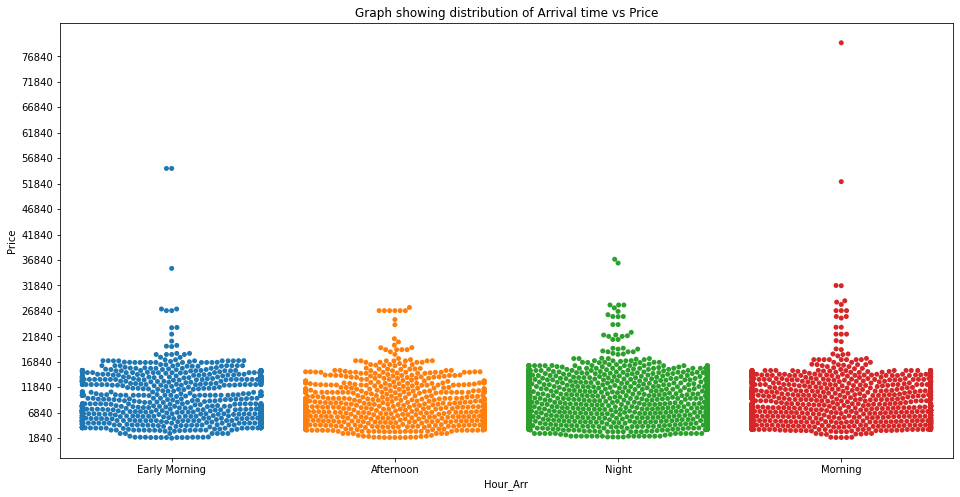

In [55]:
print(df['Hour_Arr'].value_counts())

plt.figure(figsize=(16,8), facecolor='white')
sns.swarmplot(y='Price',x='Hour_Arr',data=df) 
plt.title("Graph showing distribution of Arrival time vs Price")
plt.xticks(rotation=0)
plt.yticks(np.arange(min(df['Price']), max(df['Price']), 5000))
plt.show()

Morning          1830
Afternoon        1492
Night            1309
Early Morning     992
Name: Hour_Dep, dtype: int64


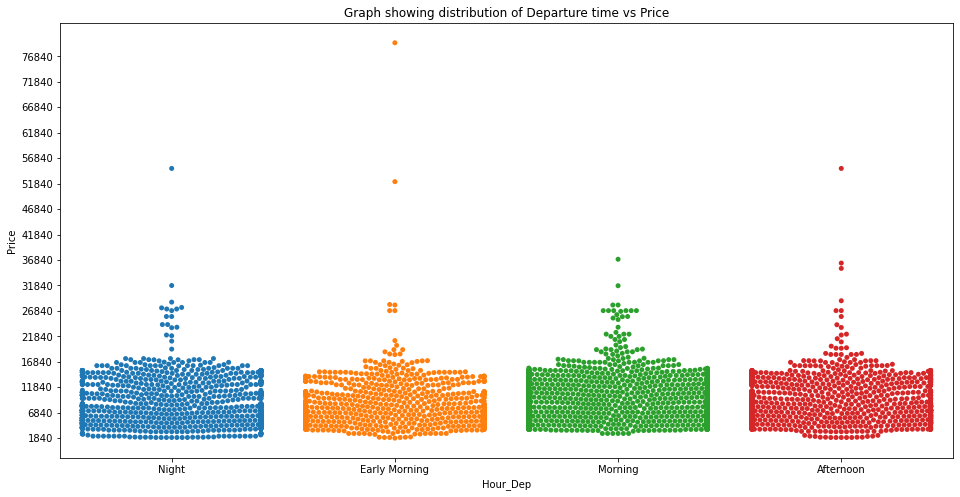

In [58]:
print(df['Hour_Dep'].value_counts())

plt.figure(figsize=(16,8), facecolor='white')
sns.swarmplot(y='Price',x='Hour_Dep',data=df) 
plt.title("Graph showing distribution of Departure time vs Price")
plt.xticks(rotation=0)
plt.yticks(np.arange(min(df['Price']), max(df['Price']), 5000))
plt.show()

## Observations
1. Are morning flights expensive?
> We see that the early morning flights from 0 to 6 AM have the price ranges below 10000 which is average price range of flights.
There is increase in price range during working hours i.e, from 9 am to 6 pm we can see there is spikes in flight prices where we can see the highest price.
Further the extended evening hours have mixed ranges of price where we can see average price also higher ranges that might be affected by some other factors.


### Feature Engineering

In [61]:
for i in df:
    if df[i].dtype == 'object':
        print(df[i].value_counts())

IndiGo               1710
Jet Airways          1451
Air India             734
Multiple carriers     465
SpiceJet              411
Vistara               339
Air Asia              276
Others                237
Name: Airline Name, dtype: int64
Delhi        2296
Kolkata      1254
Bangalore     939
Chennai       464
Mumbai        348
Kochi         122
Ahmedabad     100
Hyderabad     100
Name: Source, dtype: int64
Cochin       1696
Bangalore    1579
Delhi         939
Mumbai        400
Kolkata       364
Hyderabad     248
Chennai       175
Pune          122
Ahmedabad     100
Name: Destination, dtype: int64


In [60]:
#replacing the categorical values of Arrival time by numerical
df['Hour_Arr'].replace({'Early Morning':0,'Morning':1,'Afternoon':2,'Night':3},inplace=True)

#replacing the categorical values of Departure time by numerical
df['Hour_Dep'].replace({'Early Morning':0,'Morning':1,'Afternoon':2,'Night':3},inplace=True)


In [62]:
col =['Airline Name','Source','Destination']
df = pd.get_dummies(df,drop_first=True)
df

,Departure Date,Departure Month,Total Stops,Price,Hour_Arr,Minute_Arr,Hour_Dep,Minute_Dep,Dur_hr,Dur_sec,...,Source_Kolkata,Source_Mumbai,Destination_Bangalore,Destination_Chennai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_Mumbai,Destination_Pune
0,24,3,0,3897,0,10,3,20,2,50,...,0,0,0,0,0,1,0,0,0,0
1,1,5,2,7662,2,15,0,50,7,25,...,1,0,1,0,0,0,0,0,0,0
2,9,6,2,13882,0,25,1,25,19,0,...,0,0,0,0,1,0,0,0,0,0
3,12,5,1,6218,3,30,2,5,5,25,...,1,0,1,0,0,0,0,0,0,0
4,1,3,1,13302,3,35,2,50,4,45,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5618,20,4,1,28564,1,5,3,10,10,55,...,0,0,0,0,0,0,0,0,0,1
5619,21,5,0,6258,3,15,2,30,1,45,...,0,1,1,0,0,0,0,0,0,0
5620,20,3,1,7320,3,55,2,55,5,0,...,0,0,0,0,0,0,0,1,0,0
5621,15,5,0,7320,1,55,0,45,2,10,...,0,0,0,0,0,0,0,0,1,0


In [65]:
#dropping 'Minute_Arr', 'Minute_Dep','Dur_sec',Dur_hr' as we have already extracted useful information from the main attributes

df.drop(['Minute_Arr', 'Minute_Dep','Dur_sec', 'Dur_hr'],inplace=True,axis=1)

In [66]:
df

,Departure Date,Departure Month,Total Stops,Price,Hour_Arr,Hour_Dep,Airline Name_Air India,Airline Name_IndiGo,Airline Name_Jet Airways,Airline Name_Multiple carriers,...,Source_Kolkata,Source_Mumbai,Destination_Bangalore,Destination_Chennai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_Mumbai,Destination_Pune
0,24,3,0,3897,0,3,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,5,2,7662,2,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,0
2,9,6,2,13882,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,12,5,1,6218,3,2,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
4,1,3,1,13302,3,2,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5618,20,4,1,28564,1,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5619,21,5,0,6258,3,2,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
5620,20,3,1,7320,3,2,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5621,15,5,0,7320,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Checking for Outliers

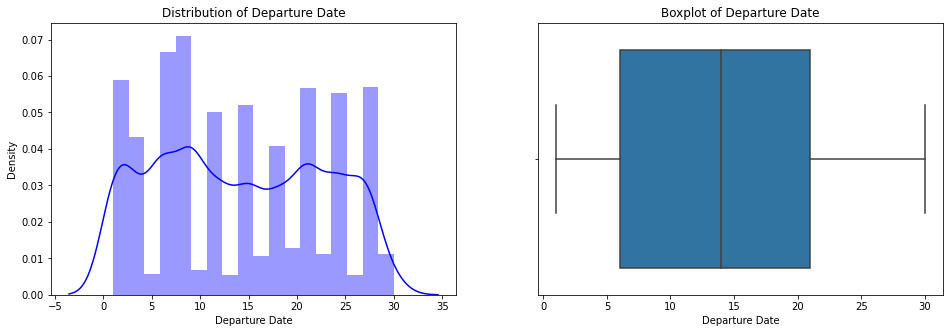

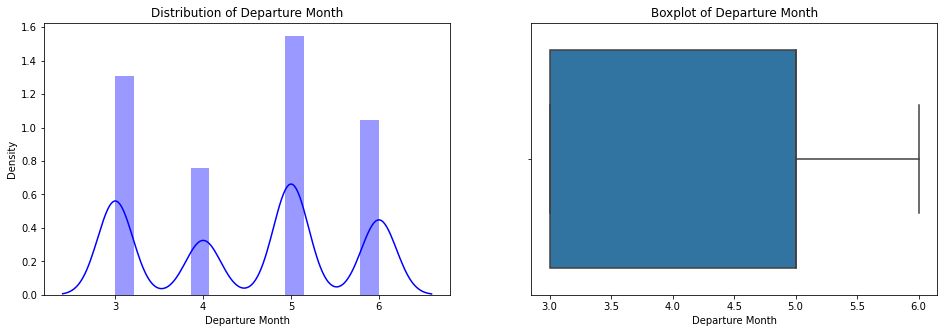

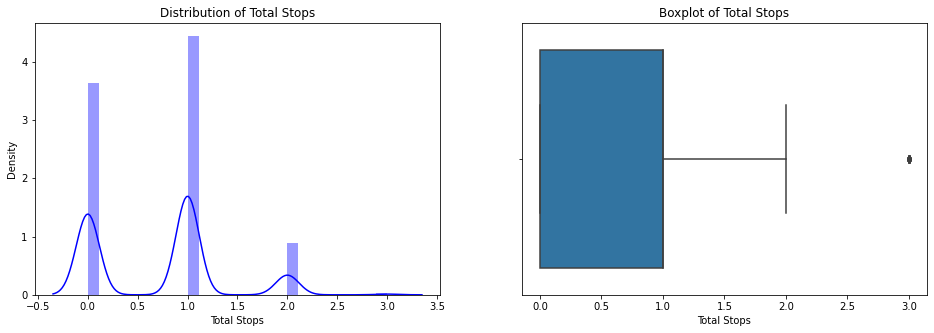

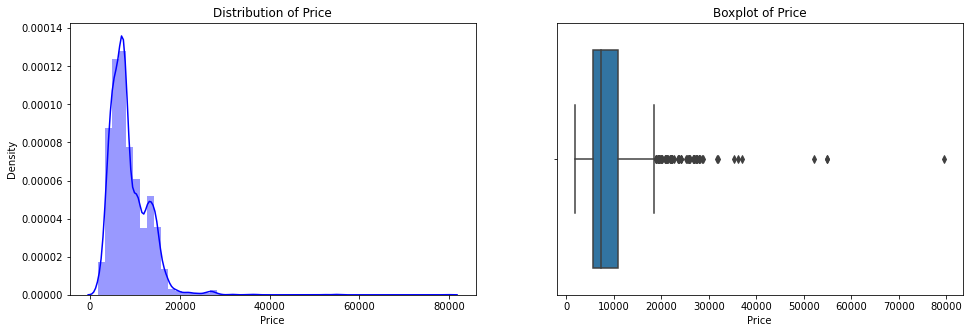

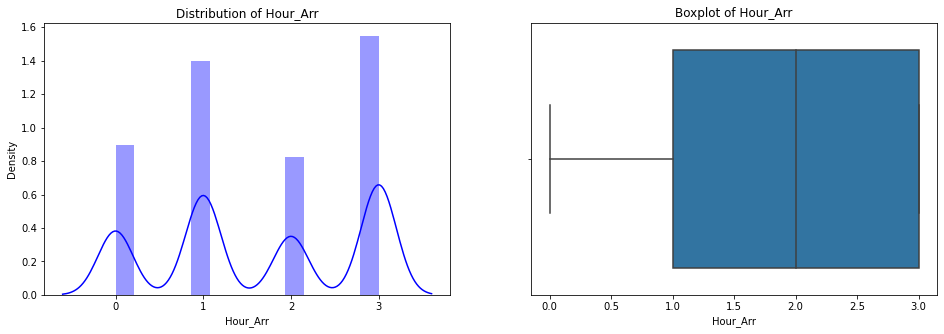

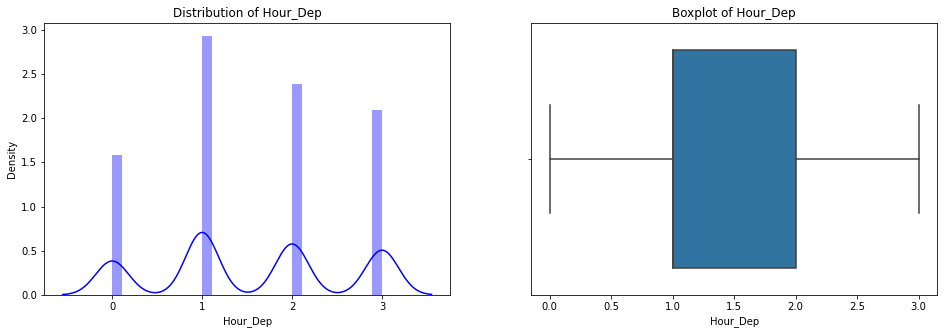

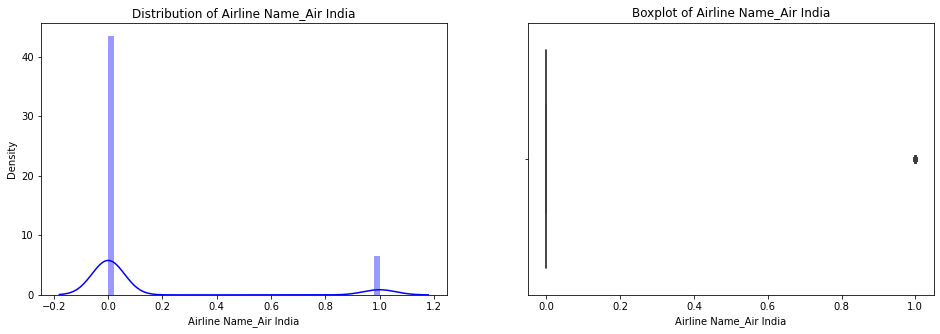

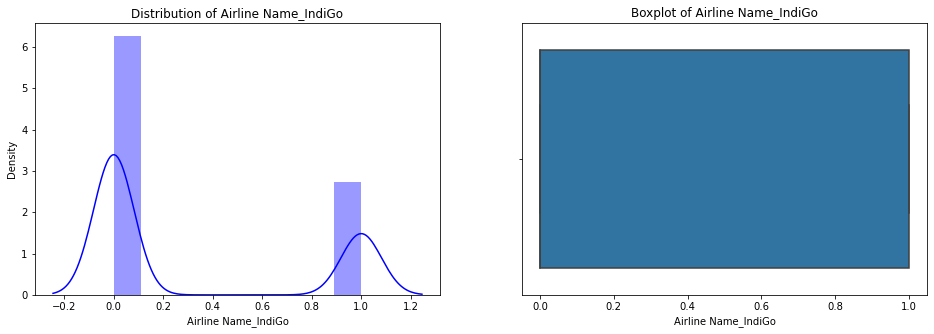

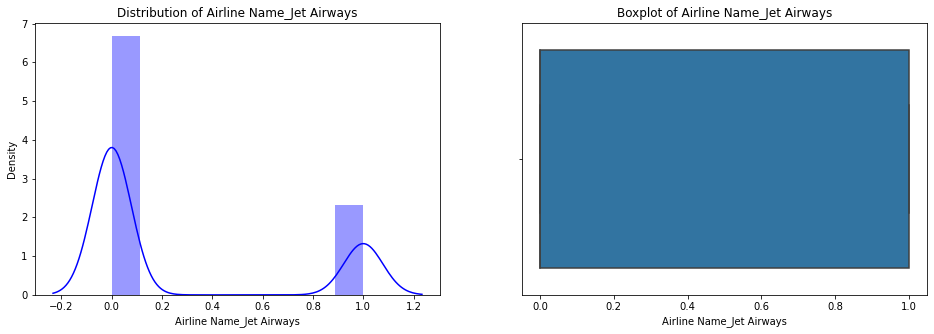

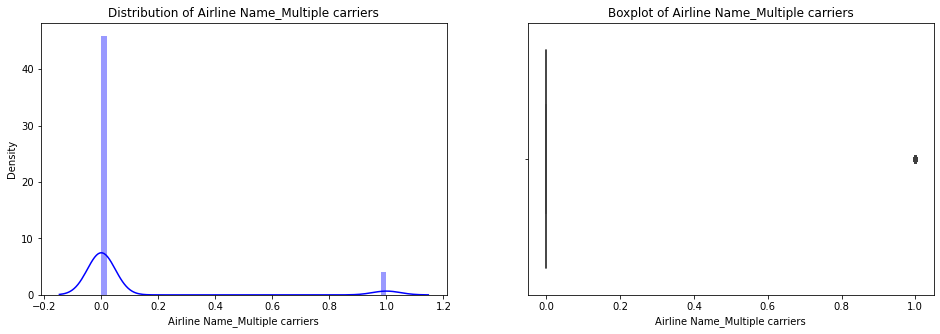

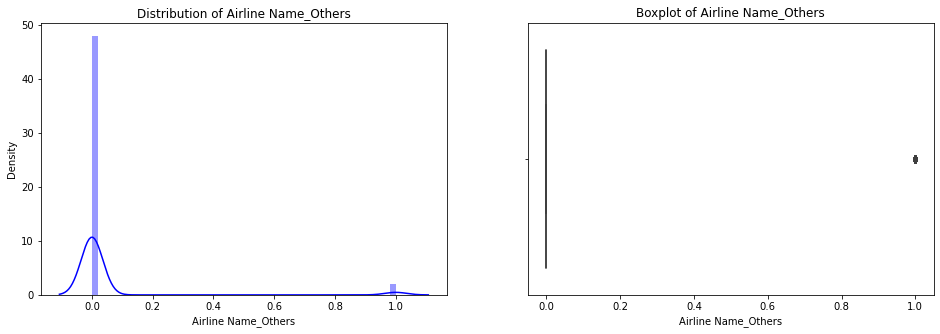

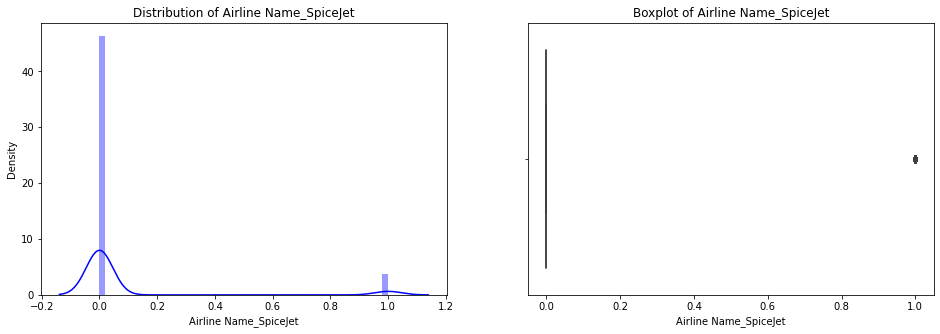

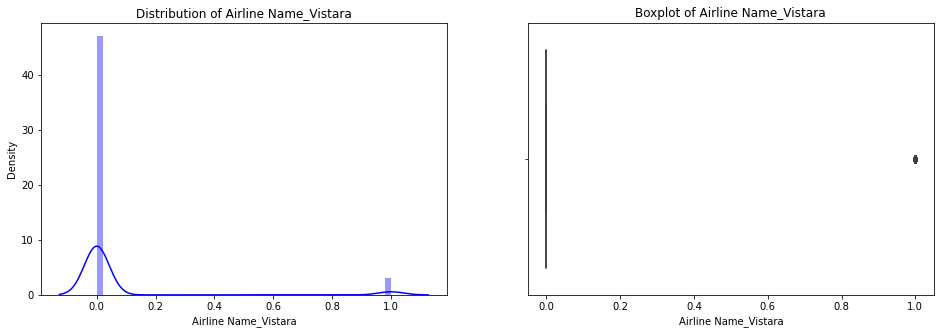

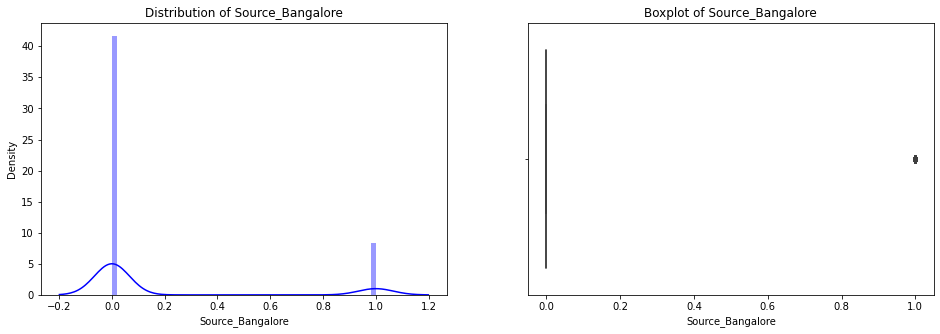

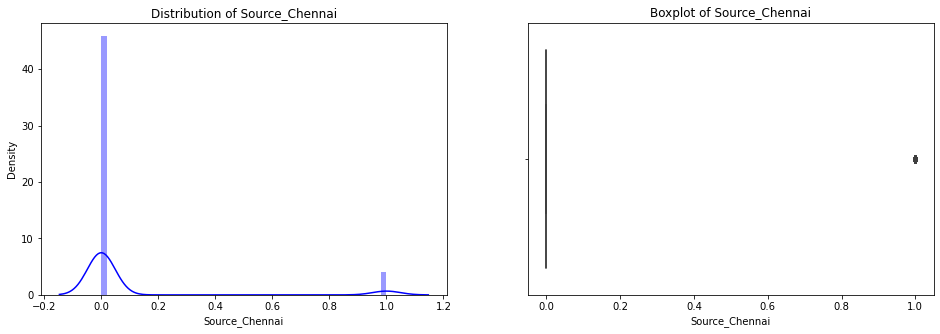

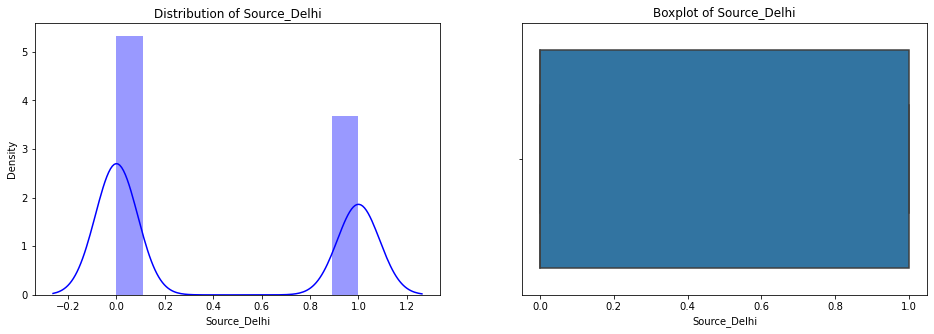

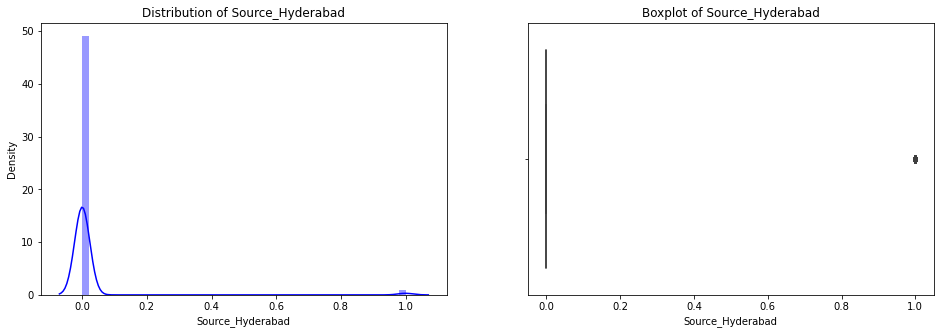

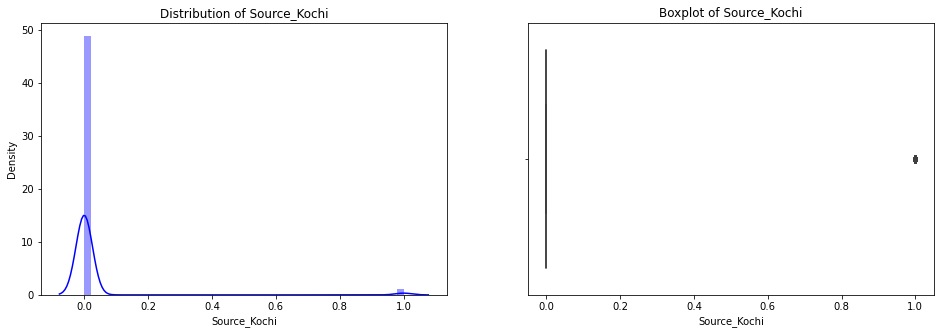

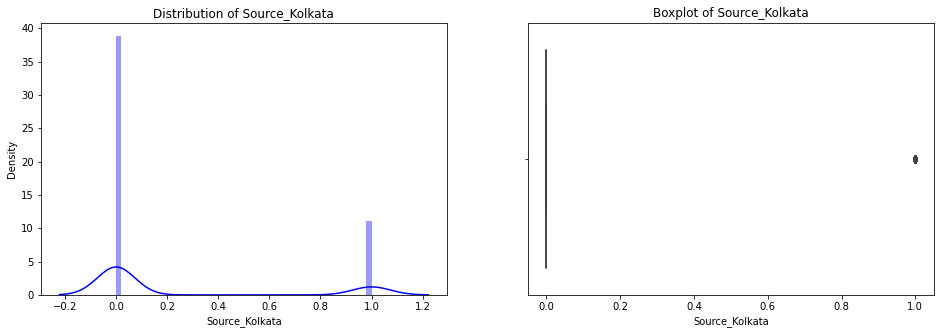

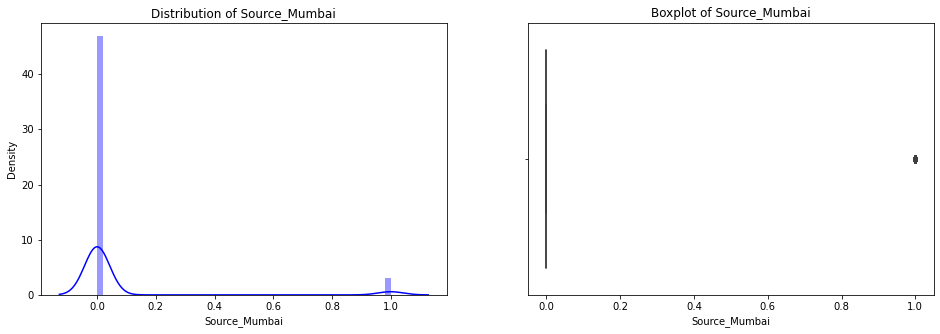

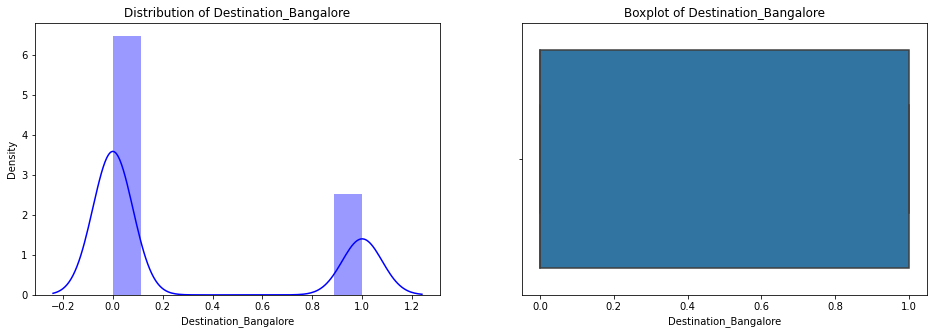

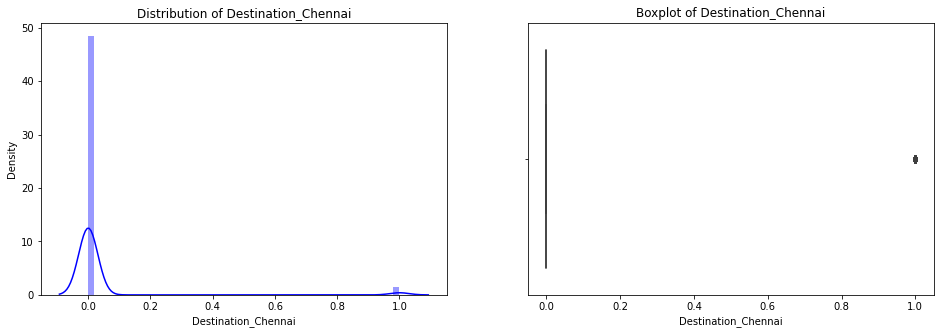

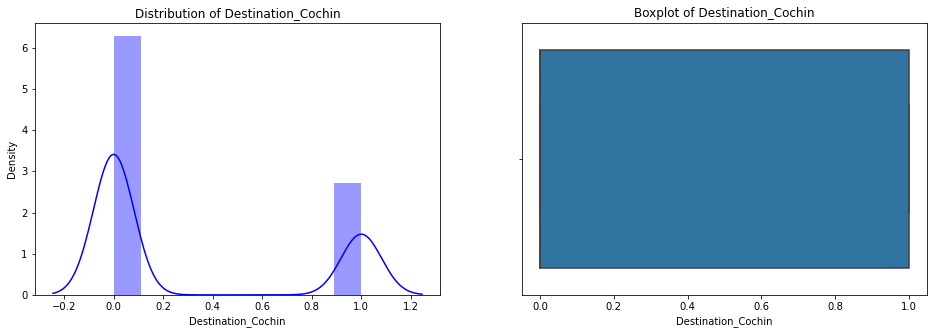

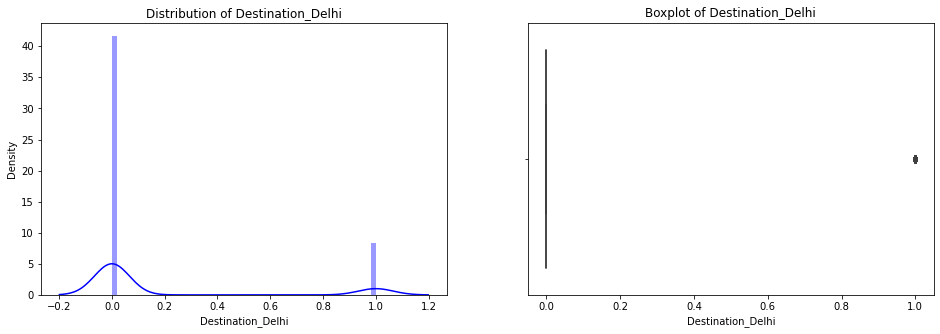

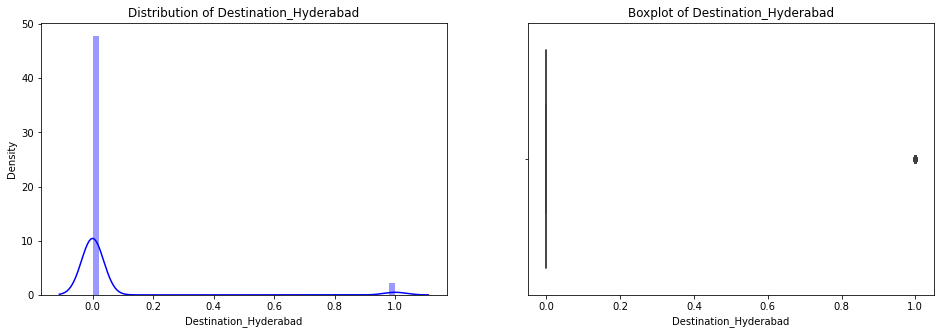

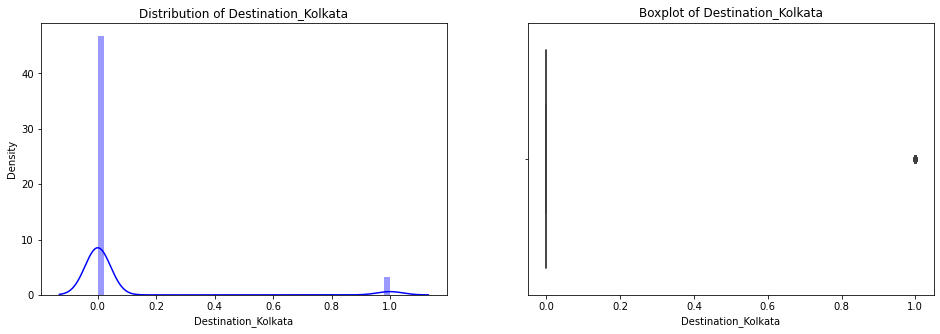

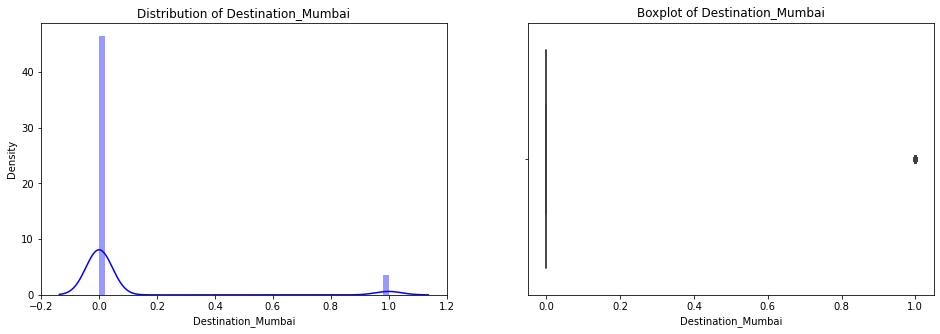

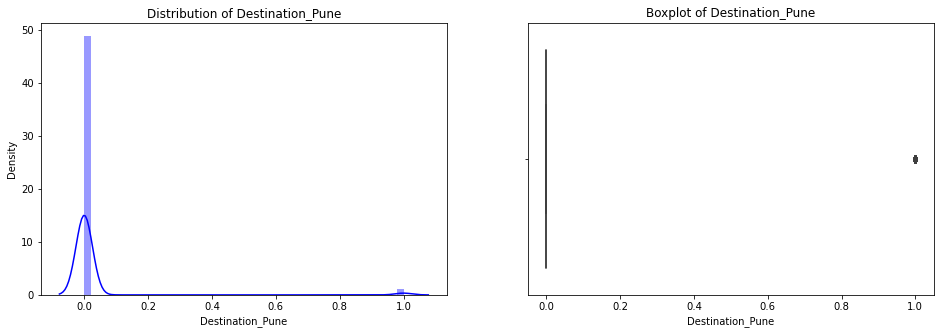

In [69]:
for i in df:    
    plt.figure(figsize=(16,5), facecolor='white')
    ax1 = plt.subplot(1,2,1)
    sns.distplot(df[i],color='Blue')
    plt.title('Distribution of {}'.format(i))
    
    ax2 = plt.subplot(1,2,2)
    sns.boxplot(df[i])
    plt.title('Boxplot of {}'.format(i))
    plt.show()

### There are some outliers in Price attribute let us remove them using z score method.

In [70]:
# zscore method

col = df[['Price']]
z_score = zscore(col)
abs_sco = np.abs(z_score)

fltr = (abs_sco<3).all(axis=1)
df = df[fltr]

#### Let us check the skewness and Correlation between the attributes in dataset

In [71]:
df.skew()

Departure Date                    0.071463
Departure Month                  -0.136509
Total Stops                       0.471663
Price                             0.712016
Hour_Arr                         -0.078248
Hour_Dep                          0.007274
Airline Name_Air India            2.202358
Airline Name_IndiGo               0.835950
Airline Name_Jet Airways          1.125958
Airline Name_Multiple carriers    3.032333
Airline Name_Others               4.554159
Airline Name_SpiceJet             3.260067
Airline Name_Vistara              3.712921
Source_Bangalore                  1.832856
Source_Chennai                    3.015217
Source_Delhi                      0.362347
Source_Hyderabad                  7.259938
Source_Kochi                      6.772754
Source_Kolkata                    1.315426
Source_Mumbai                     3.640501
Destination_Bangalore             0.959974
Destination_Chennai               5.371566
Destination_Cochin                0.857117
Destination

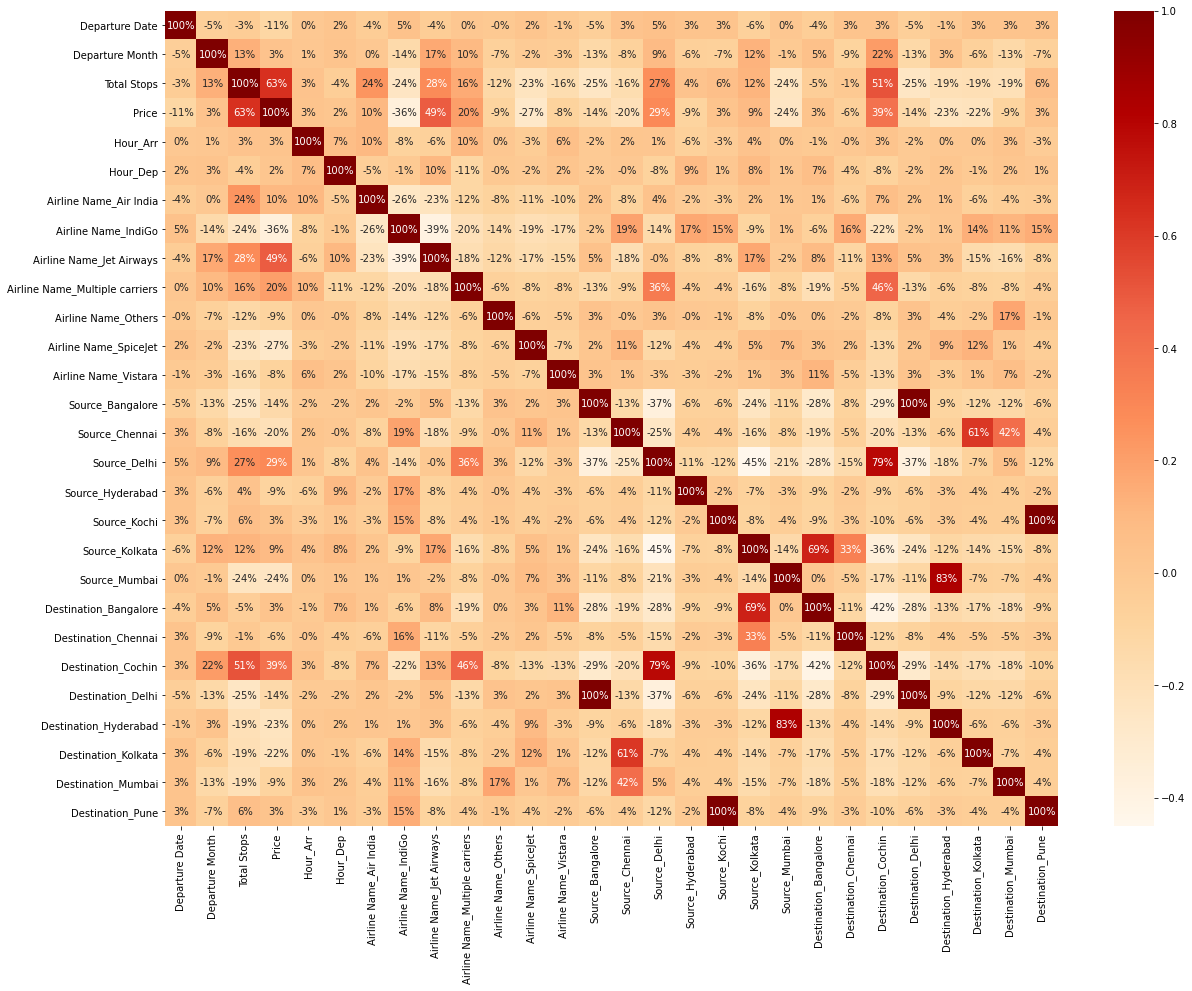

In [72]:
corr = df.corr()
plt.figure(figsize=(20,15), facecolor='white')
sns.heatmap(corr,fmt='.0%', annot=True, cmap='OrRd')
plt.show()

Price                             1.000000
Total Stops                       0.633643
Airline Name_Jet Airways          0.486082
Destination_Cochin                0.394080
Source_Delhi                      0.291850
Airline Name_Multiple carriers    0.202386
Airline Name_Air India            0.100185
Source_Kolkata                    0.091459
Departure Month                   0.032408
Hour_Arr                          0.028587
Source_Kochi                      0.028263
Destination_Pune                  0.028263
Destination_Bangalore             0.026314
Hour_Dep                          0.017370
Destination_Chennai              -0.057041
Airline Name_Vistara             -0.076480
dtype: float64


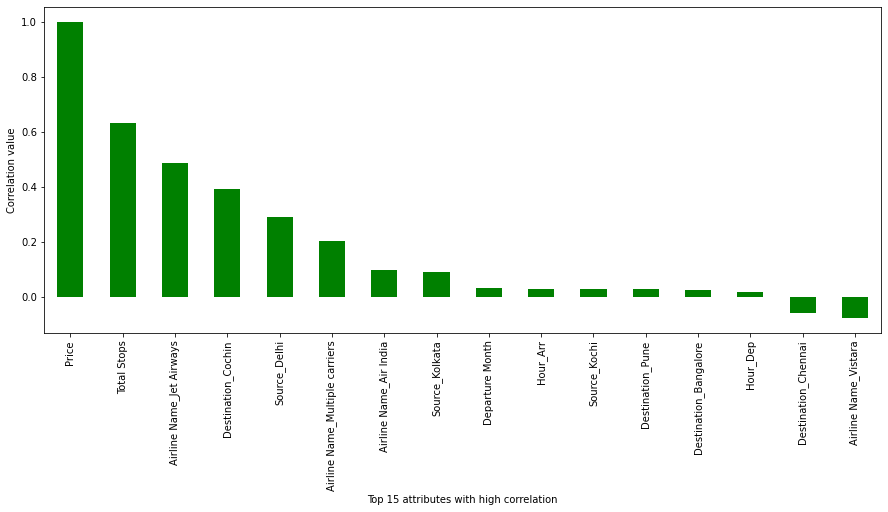

In [73]:
#checking correlation of attributes with Salesprice
corr_sale = df.corrwith(df['Price']).sort_values(ascending=False).head(16)
plt.figure(figsize=(15,6))
corr_sale.plot.bar(color='green')
plt.xlabel('Top 15 attributes with high correlation')
plt.ylabel('Correlation value')
plt.style.use('ggplot') 
print(corr_sale)
plt.show()

## Model Building

Let us proceed with model building by splitting the independent and target variables

In [74]:
#splitting the data
X = df.drop('Price', axis=1)
y = df['Price']

In [75]:
#Checking the importance of the attributes
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['vif']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


vif

,Features,vif
0,Departure Date,1.018996
1,Departure Month,1.159822
2,Total Stops,2.179911
3,Hour_Arr,1.054447
4,Hour_Dep,1.058164
5,Airline Name_Air India,3.439301
6,Airline Name_IndiGo,5.103741
7,Airline Name_Jet Airways,5.075837
8,Airline Name_Multiple carriers,2.935626
9,Airline Name_Others,1.844859


#### Based on VIF method we find that 'Source_Bangalore', 'Source_Kochi', 'Destination_Bangalore', 'Destination_Cochin', 'Destination_Delhi', 'Destination_Pune' have very high variance wrt other variables, let us proceed by dropping these attributes

In [76]:
X.drop(['Source_Bangalore','Source_Kochi','Destination_Bangalore','Destination_Cochin','Destination_Delhi','Destination_Pune'],inplace=True,axis=1)

In [77]:
#Checking the importance of the attributes

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['vif']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


vif

,Features,vif
0,Departure Date,3.567727
1,Departure Month,13.073186
2,Total Stops,3.565906
3,Hour_Arr,3.183872
4,Hour_Dep,3.294570
5,Airline Name_Air India,2.840230
6,Airline Name_IndiGo,4.462448
7,Airline Name_Jet Airways,4.709686
8,Airline Name_Multiple carriers,2.449978
9,Airline Name_Others,1.503901


### Standardization and splitting the dataset into train and test datasets

In [78]:
#standardizing the data

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X) 

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,random_state=56, test_size=0.25)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4174, 21), (1392, 21), (4174,), (1392,))

### Building different models and evaluating the models using different regression metrics
## 1. Linear Regression

*******************Results********************
The r2 score is: 0.639223104892836
The mean absolute error 1674.5803795760517
The mean squared error 4977429.777469242
root mean square error 2231.0154139918536
The cross validation score 0.4161699825171771

*****************XXXXXXXXXXX********************


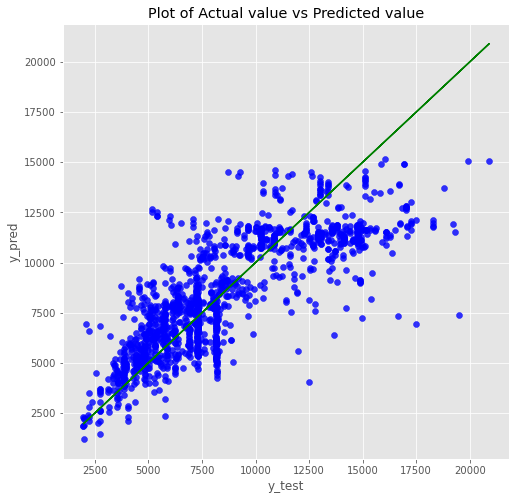

In [80]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))
cv = cross_val_score(lm, X,y,cv=5)
print('The cross validation score', cv.mean())

print("\n*****************XXXXXXXXXXX********************")

#graph
plt.figure(figsize=(8,8), facecolor='w')
plt.scatter(y_test, y_pred,alpha=0.8,color='blue')
plt.plot(y_test, y_test, color='green')
plt.title('Plot of Actual value vs Predicted value')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

##  Lasso

*******************Results********************
The r2 score is: 0.6391095671267979
The mean absolute error 1674.8002560105617
The mean squared error 4978996.192240281
root mean square error 2231.366440600979
The cross validation score 0.41667376676527634

*****************XXXXXXXXXXX********************


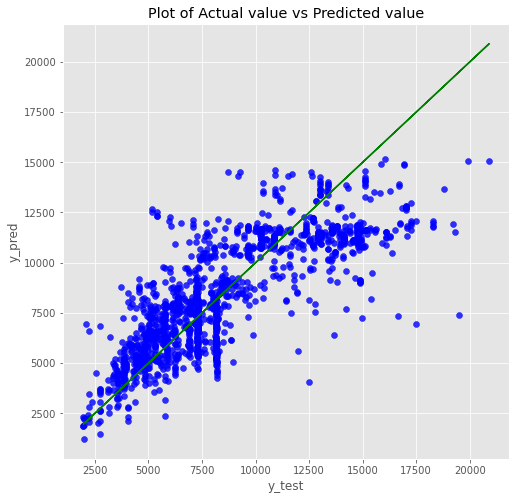

In [81]:
lass_lm = Lasso()
lass_lm.fit(X_train, y_train)
y_pred = lass_lm.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))
cv = cross_val_score(lass_lm, X,y,cv=5)
print('The cross validation score', cv.mean())

print("\n*****************XXXXXXXXXXX********************")

#graph
plt.figure(figsize=(8,8), facecolor='w')
plt.scatter(y_test, y_pred,alpha=0.8,color='blue')
plt.plot(y_test, y_test, color='green')
plt.title('Plot of Actual value vs Predicted value')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## 2. Random Forest

*******************Results********************
The r2 score is: 0.750992236927817
The mean absolute error 1285.3638730331722
The mean squared error 3435415.824974979
root mean square error 1853.4874763469481
The cross validation score 0.5527688013999414

*****************XXXXXXXXXXX********************


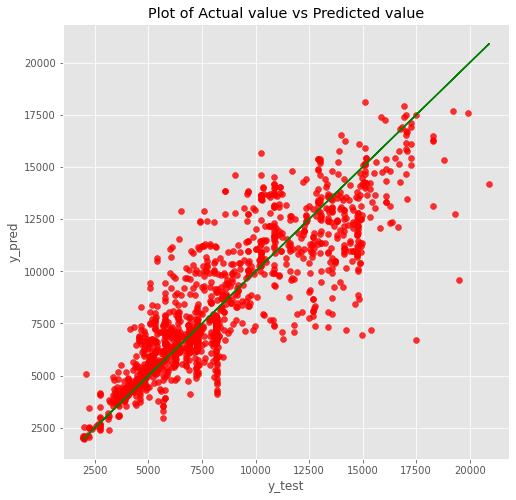

In [83]:
rand_for = RandomForestRegressor()
rand_for.fit(X_train, y_train)
y_pred = rand_for.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))
cv = cross_val_score(rand_for, X,y,cv=5)
print('The cross validation score', cv.mean())

print("\n*****************XXXXXXXXXXX********************")

#graph
plt.figure(figsize=(8,8), facecolor='w')
plt.scatter(y_test, y_pred,alpha=0.8,color='red')
plt.plot(y_test, y_test, color='green')
plt.title('Plot of Actual value vs Predicted value')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## 3. Gradient Boosting Regression

*******************Results********************
The r2 score is: 0.7414329844252934
The mean absolute error 1400.4772471554022
The mean squared error 3567299.2928513656
root mean square error 1888.7295446546511
The cross validation score 0.536161839157244

*****************XXXXXXXXXXX********************


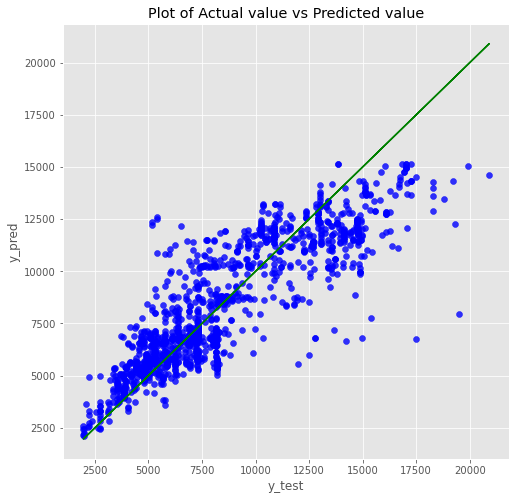

In [84]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))
cv = cross_val_score(gbr, X,y,cv=5)
print('The cross validation score', cv.mean())

print("\n*****************XXXXXXXXXXX********************")

#graph
plt.figure(figsize=(8,8), facecolor='w')
plt.scatter(y_test, y_pred,alpha=0.8,color='blue')
plt.plot(y_test, y_test, color='green')
plt.title('Plot of Actual value vs Predicted value')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## 4. XGBoost regression

*******************Results********************
The r2 score is: 0.7703698905835261
The mean absolute error 1287.462196963957
The mean squared error 3168073.5654470706
root mean square error 1779.9083025389457
The cross validation score 0.5603682406547419

*****************XXXXXXXXXXX********************


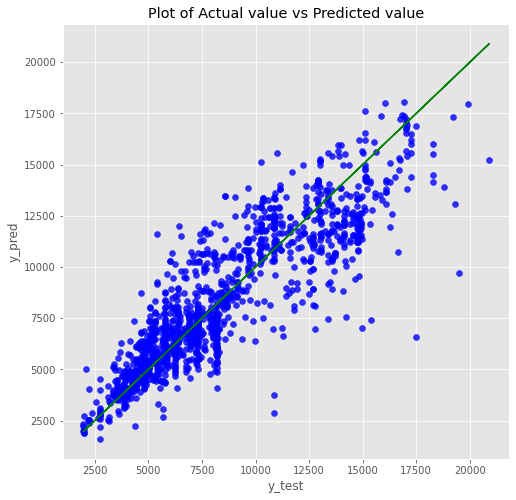

In [85]:
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))
cv = cross_val_score(xgbr, X,y,cv=5)
print('The cross validation score', cv.mean())

print("\n*****************XXXXXXXXXXX********************")

#graph
plt.figure(figsize=(8,8), facecolor='w')
plt.scatter(y_test, y_pred,alpha=0.8,color='blue')
plt.plot(y_test, y_test, color='green')
plt.title('Plot of Actual value vs Predicted value')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## 5. Deciscion Tree Regression

*******************Results********************
The r2 score is: 0.6485541765225082
The mean absolute error 1434.8615854267953
The mean squared error 4848694.38888114
root mean square error 2201.975110867773
The cross validation score 0.3281480806485617

*****************XXXXXXXXXXX********************


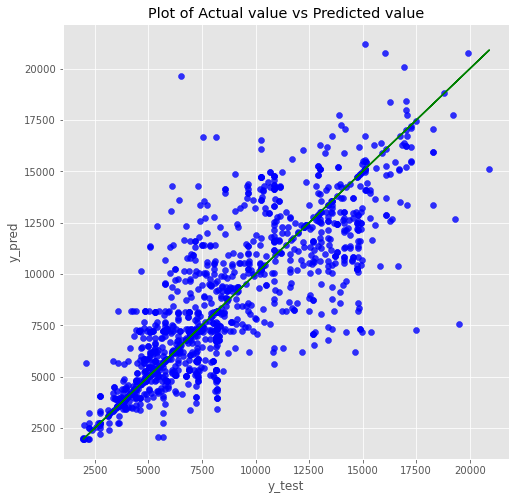

In [86]:
dec_reg = DecisionTreeRegressor()
dec_reg.fit(X_train, y_train)
y_pred = dec_reg.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))
cv = cross_val_score(dec_reg, X,y,cv=5)
print('The cross validation score', cv.mean())

print("\n*****************XXXXXXXXXXX********************")

#graph
plt.figure(figsize=(8,8), facecolor='w')
plt.scatter(y_test, y_pred,alpha=0.8,color='blue')
plt.plot(y_test, y_test, color='green')
plt.title('Plot of Actual value vs Predicted value')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

1. We can see too big values in MAE and MSE, that is due to individual parameters we got after the encoding of the Attributes.
2. As per the models we trained, we got several CV score, and graphs for the values predicted. 
3. Decision tree has least difference between CV score to R2score value. Hence choosing Gradient Boosting  to be BEST Model.

## Hyperparameter Optimization

Let us tune the parameters to improve th emodel performances using GridsearchCV.

In [88]:
random_forest_grid = RandomForestRegressor()

params = {'max_depth':[1,5,8,12],
           'min_samples_split':[2,4,7,12,16],
           'min_samples_leaf':[1,5,8,3,12],
           'max_features':['auto','sqrt']
         }
          
grid_CV = GridSearchCV(estimator=random_forest_grid, param_grid=params)
grid_CV.fit(X_train, y_train)
grid_CV.best_params_

{'max_depth': 12,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 12}

*******************Results********************
The r2 score is: 0.7703350776668711
The mean absolute error 1268.2378705290814
The mean squared error 3168553.8590865727
root mean square error 1780.0432183198734
The cross validation score 0.5905435809487067

*****************XXXXXXXXXXX********************


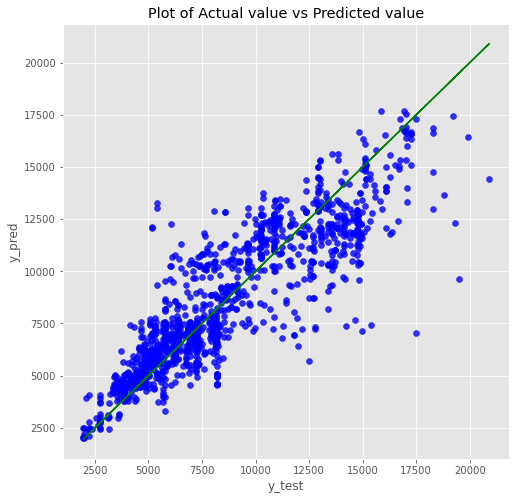

In [89]:
random_forest_grid = RandomForestRegressor(max_depth=12, max_features='auto', min_samples_leaf=3, min_samples_split=12)
random_forest_grid.fit(X_train, y_train)
y_pred = random_forest_grid.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))
cv = cross_val_score(random_forest_grid, X,y,cv=5)
print('The cross validation score', cv.mean())

print("\n*****************XXXXXXXXXXX********************")

#graph
plt.figure(figsize=(8,8), facecolor='w')
plt.scatter(y_test, y_pred,alpha=0.8,color='blue')
plt.plot(y_test, y_test, color='green')
plt.title('Plot of Actual value vs Predicted value')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## Saving the best model

Let us save the best model 

In [90]:
import pickle

file = open('Flight Price Prediction.pkl', 'wb')

pickle.dump('random_forest_grid',file)